# Introduction to Matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

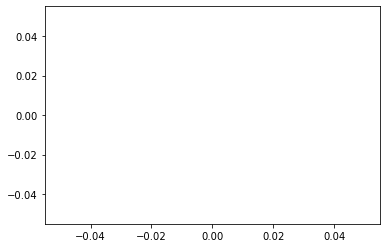

In [3]:
plt.plot();

<function matplotlib.pyplot.show(close=None, block=None)>

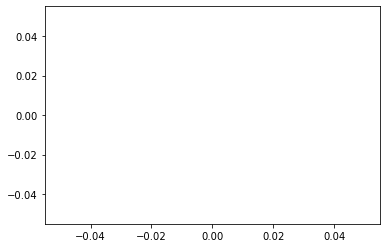

In [4]:
plt.plot()
plt.show

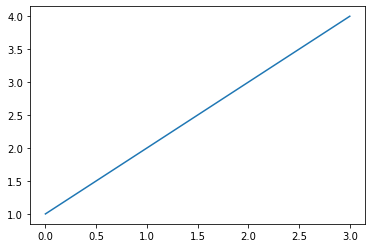

In [5]:
plt.plot([1, 2, 3, 4]);

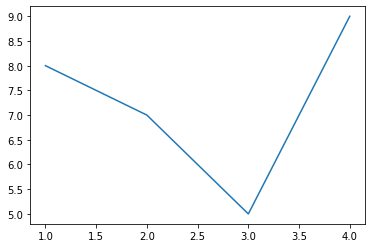

In [9]:
x = [1, 2, 3, 4]
y = [8, 7, 5, 9]
plt.plot(x, y)

<function matplotlib.pyplot.show(close=None, block=None)>

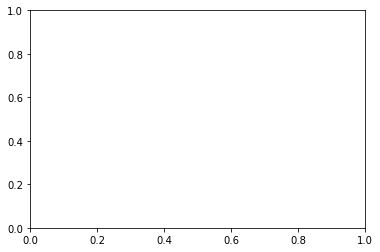

In [10]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show

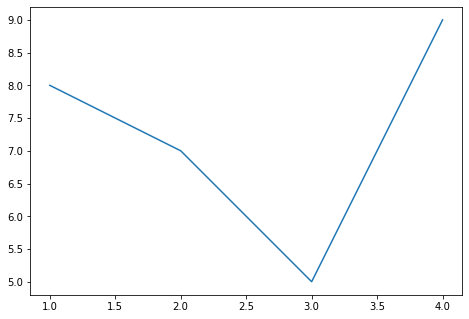

In [11]:
# 2nd method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)

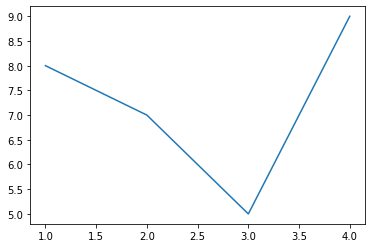

In [13]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x, y); # add data

## Matplotlib example workflow

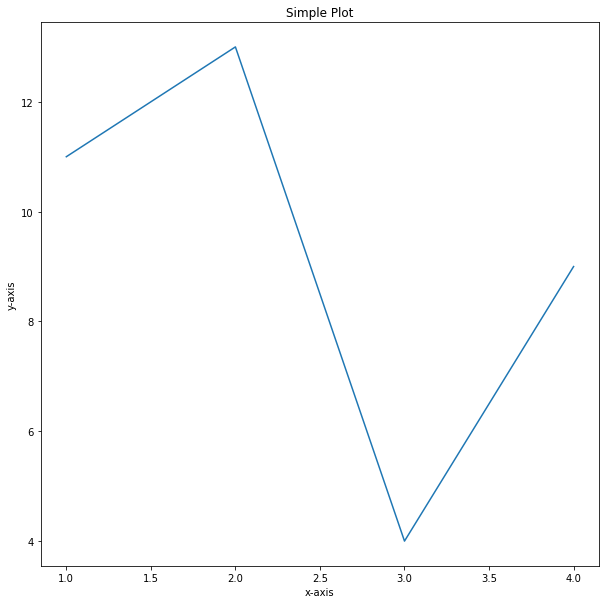

In [19]:
# 0. import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 13, 4, 9]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Simple Plot",
       xlabel="x-axis",
       ylabel="y-axis")

# 5. Save and show (you save the whole figure)
fig.savefig("images/sample-plot.png")

## Making figures with NumPy arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [20]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

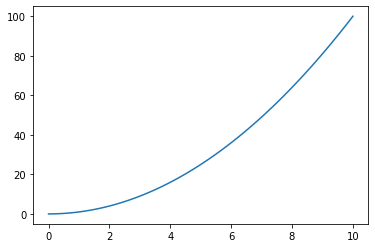

In [21]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2);

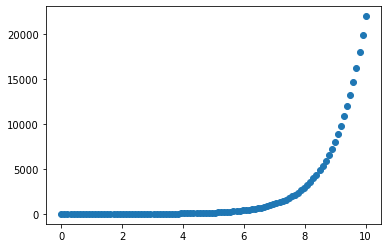

In [22]:
# Use same data to make a scatter
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

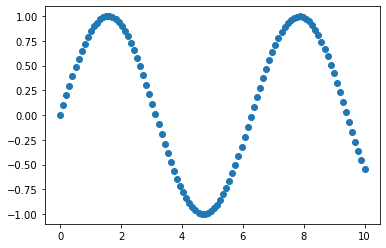

In [24]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

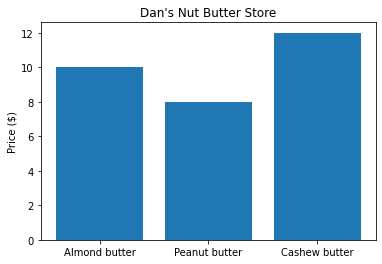

In [26]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values()) 
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)");

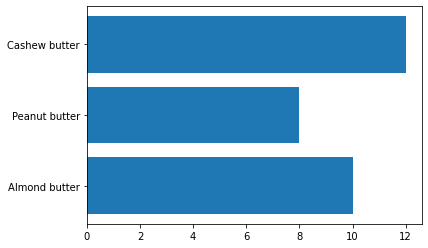

In [29]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

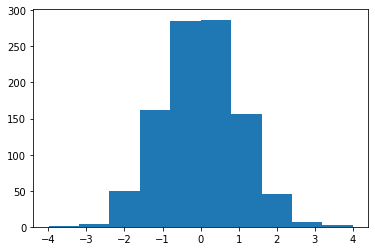

In [30]:
# Make some data for histograms and plot it
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

### Two options for subplots 

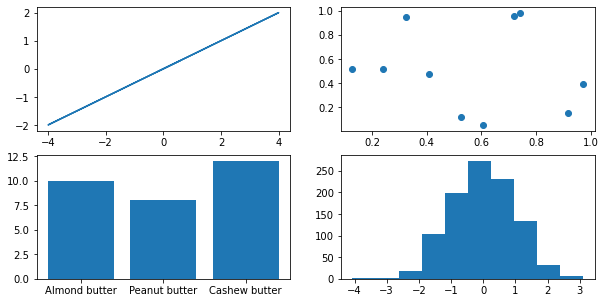

In [35]:
# Subplot option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(10, 5))
# Plot to each different axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

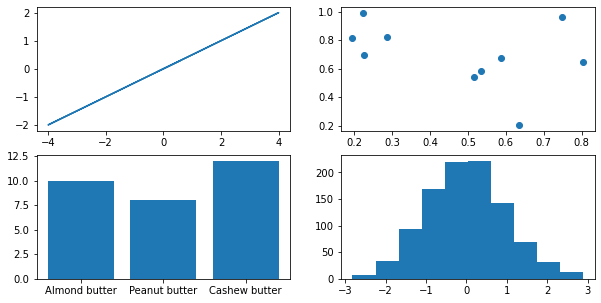

In [38]:
# Subplot option 2
fig, ax = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10, 5))

# Plot to each different index
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));